In [1]:
import os
import os.path as op
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Function definitions

In [2]:
def edgelist2mat(edgelist, N):
    mat = np.zeros((N, N))
    for edge in edgelist:
        mat[int(edge[0]-1), int(edge[1]-1)] = edge[2]
        mat[int(edge[1]-1), int(edge[0]-1)] = edge[2]
    return mat

In [3]:
def load_graphs(directory, N):
    fls = [op.join(directory, f) for f in os.listdir(directory)]
    stacked = np.empty((N, N, len(fls)))
    
    for idx, fl in enumerate(fls):
        tmp_elist = np.loadtxt(fl)
        stacked[:,:, idx] = edgelist2mat(tmp_elist, N)
    
    return stacked

## Diffusion

In [4]:
data_dir_dwi = '/Users/greg/code/gkiar/3d-cnn-ae/hcp1200_dwi_DKT/'
N = 83

In [5]:
stacked_dwi = load_graphs(data_dir_dwi, N)
avg_dwi = np.mean(stacked_dwi, axis=2)

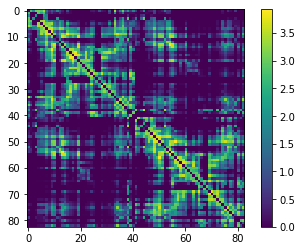

In [6]:
plt.imshow(np.log10(avg_dwi+1))
plt.colorbar()

## Functional

In [7]:
data_dir_fmri = '/Users/greg/code/gkiar/3d-cnn-ae/hcp1200_fmri_DKT/'
N = 83

In [8]:
stacked_fmri = load_graphs(data_dir_fmri, N)
avg_fmri = np.mean(stacked_fmri, axis=2)

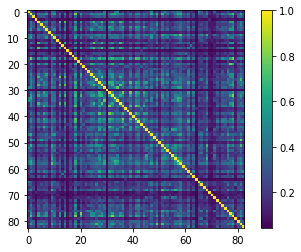

In [9]:
plt.imshow(avg_fmri)
plt.colorbar()